### Objetivo del estudio
Analizar y rpredecir cuando se cancela una reserva.

We will analyze and make our data visual firstly.

After that we will do feature engineering.

After that we will train several machine learning algorithms and do predictions with them in order to

see how they perform.

On predicting new data.

At the end of the project, we will create a new customer and try to predict the cancellation.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\USER\AppData\Local\Temp\ipykernel_39916\2011421623.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("CourseData.csv")
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


# Visualización de los datos

In [5]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [8]:
data.iloc[data["no_of_previous_cancellations"].idxmax()]

Booking_ID                                 INN12098
no_of_adults                                      2
no_of_children                                    0
no_of_weekend_nights                              1
no_of_week_nights                                 1
type_of_meal_plan                       Meal Plan 1
required_car_parking_space                        0
room_type_reserved                      Room_Type 1
lead_time                                       190
arrival_year                                   2018
arrival_month                                     4
arrival_date                                      9
market_segment_type                         Offline
repeated_guest                                    1
no_of_previous_cancellations                     13
no_of_previous_bookings_not_canceled              1
avg_price_per_room                             70.0
no_of_special_requests                            0
booking_status                             Canceled
Name: 12097,

In [10]:
data.iloc[data["no_of_previous_cancellations"].idxmin()]

Booking_ID                                  INN00001
no_of_adults                                       2
no_of_children                                     0
no_of_weekend_nights                               1
no_of_week_nights                                  2
type_of_meal_plan                        Meal Plan 1
required_car_parking_space                         0
room_type_reserved                       Room_Type 1
lead_time                                        224
arrival_year                                    2017
arrival_month                                     10
arrival_date                                       2
market_segment_type                          Offline
repeated_guest                                     0
no_of_previous_cancellations                       0
no_of_previous_bookings_not_canceled               0
avg_price_per_room                              65.0
no_of_special_requests                             0
booking_status                          Not_Ca

In [11]:
data.iloc[data["avg_price_per_room"].idxmax()]

Booking_ID                                 INN33115
no_of_adults                                      2
no_of_children                                    0
no_of_weekend_nights                              0
no_of_week_nights                                 1
type_of_meal_plan                       Meal Plan 1
required_car_parking_space                        0
room_type_reserved                      Room_Type 1
lead_time                                        35
arrival_year                                   2018
arrival_month                                     3
arrival_date                                     25
market_segment_type                         Offline
repeated_guest                                    0
no_of_previous_cancellations                      0
no_of_previous_bookings_not_canceled              0
avg_price_per_room                            540.0
no_of_special_requests                            0
booking_status                             Canceled
Name: 33114,

In [12]:
data.iloc[data["avg_price_per_room"].idxmin()]

Booking_ID                                   INN00064
no_of_adults                                        1
no_of_children                                      0
no_of_weekend_nights                                0
no_of_week_nights                                   1
type_of_meal_plan                         Meal Plan 1
required_car_parking_space                          0
room_type_reserved                        Room_Type 1
lead_time                                           2
arrival_year                                     2017
arrival_month                                       9
arrival_date                                       10
market_segment_type                     Complementary
repeated_guest                                      0
no_of_previous_cancellations                        0
no_of_previous_bookings_not_canceled                0
avg_price_per_room                                0.0
no_of_special_requests                              1
booking_status              

In [13]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [14]:
data.duplicated().sum()

0

In [16]:
data["no_of_children"].value_counts().sort_values(ascending=False)

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

<Axes: xlabel='no_of_children', ylabel='count'>

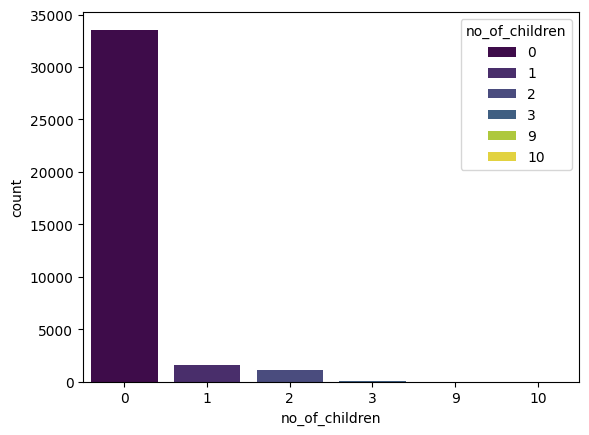

In [20]:
sns.countplot(x="no_of_children", hue="no_of_children", data = data, palette='viridis')

In [21]:
data["type_of_meal_plan"].value_counts().sort_values(ascending=False)

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [23]:
mealTypeLabels = data["type_of_meal_plan"].unique()

([<matplotlib.patches.Wedge at 0x1e56e081eb0>,
 [Text(-0.8189979695795291, 0.7343312098941518, 'Meal Plan 1'),
  Text(0.5779432554485346, -0.9359388834114918, 'Not Selected'),
  Text(1.0549774563479715, -0.31148445643011513, 'Meal Plan 2'),
  Text(1.099999896803181, -0.0004764797912536568, 'Meal Plan 3')])

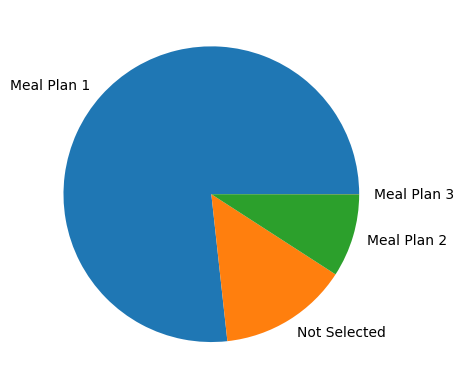

In [24]:
plt.pie(data["type_of_meal_plan"].value_counts(), labels = mealTypeLabels)

In [26]:
data["room_type_reserved"].value_counts().sort_values(ascending=False)

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='room_type_reserved'>

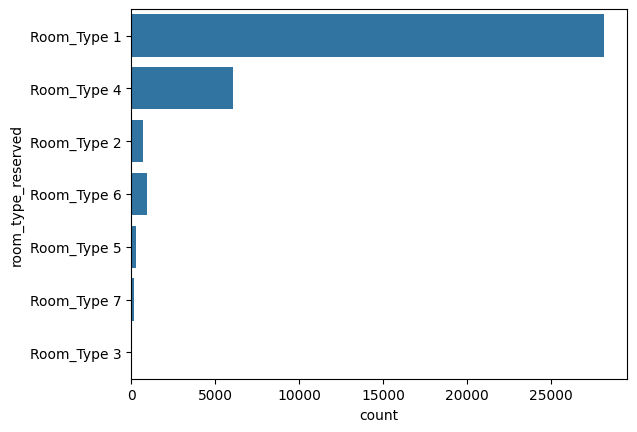

In [32]:
sns.countplot(data["room_type_reserved"])

In [30]:
data["required_car_parking_space"].value_counts().sort_values(ascending=False)

required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64

<Axes: xlabel='required_car_parking_space', ylabel='count'>

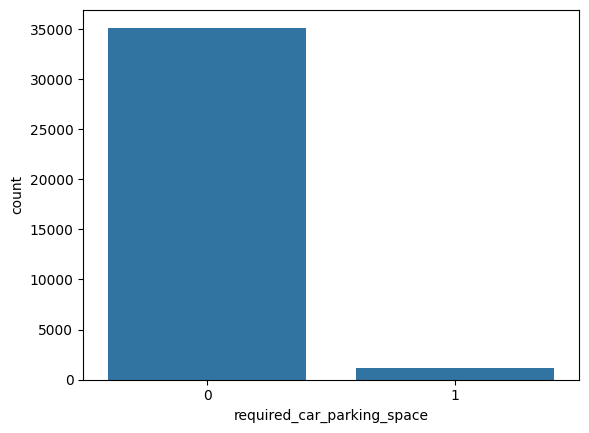

In [33]:
sns.countplot(x = data["required_car_parking_space"], data = data)

In [34]:
data["booking_status"].value_counts().sort_values(ascending=False)

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [35]:
bookingStatusLabels = data["booking_status"].unique()

([<matplotlib.patches.Wedge at 0x1e56f7ce570>,
 [Text(-0.5669614309335993, 0.9426318135060612, 'Not_Canceled'),
  Text(0.5669614309335992, -0.9426318135060612, 'Canceled')])

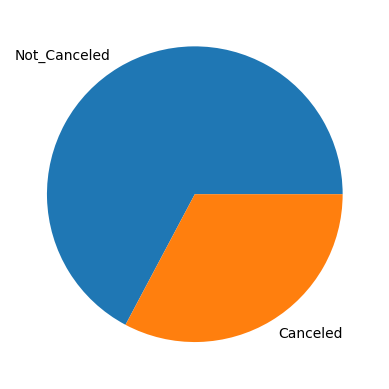

In [36]:
plt.pie(data["booking_status"].value_counts(), labels=bookingStatusLabels)

In [38]:
data=data[["no_of_adults", "no_of_children", "no_of_weekend_nights", "type_of_meal_plan", "room_type_reserved", "no_of_previous_cancellations", "avg_price_per_room", "booking_status"]]
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,no_of_previous_cancellations,avg_price_per_room,booking_status
0,2,0,1,Meal Plan 1,Room_Type 1,0,65.00,Not_Canceled
1,2,0,2,Not Selected,Room_Type 1,0,106.68,Not_Canceled
2,1,0,2,Meal Plan 1,Room_Type 1,0,60.00,Canceled
3,2,0,0,Meal Plan 1,Room_Type 1,0,100.00,Canceled
4,2,0,1,Not Selected,Room_Type 1,0,94.50,Canceled


# Machine Learning

In [39]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [40]:
data["type_of_meal_plan"] = labelencoder.fit_transform(data["type_of_meal_plan"])
data["room_type_reserved"] = labelencoder.fit_transform(data["room_type_reserved"])
data["booking_status"] = labelencoder.fit_transform(data["booking_status"])

C:\Users\USER\AppData\Local\Temp\ipykernel_39916\2057290195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["type_of_meal_plan"] = labelencoder.fit_transform(data["type_of_meal_plan"])
C:\Users\USER\AppData\Local\Temp\ipykernel_39916\2057290195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["room_type_reserved"] = labelencoder.fit_transform(data["room_type_reserved"])
C:\Users\USER\AppData\Local\Temp\ipykernel_39916\2057290195.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

In [43]:
data.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,no_of_previous_cancellations,avg_price_per_room,booking_status
0,2,0,1,0,0,0,65.00,1
1,2,0,2,3,0,0,106.68,1
2,1,0,2,0,0,0,60.00,0
3,2,0,0,0,0,0,100.00,0
4,2,0,1,3,0,0,94.50,0
5,2,0,0,1,0,0,115.00,0
6,2,0,1,0,0,0,107.55,1
7,2,0,1,0,3,0,105.61,1
8,3,0,0,0,0,0,96.90,1
9,2,0,0,0,3,0,133.44,1


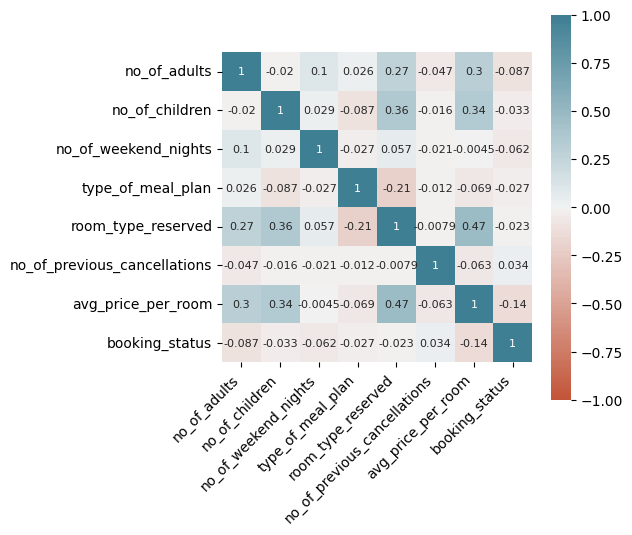

In [46]:
corr_matrix = data.corr(method='pearson')
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [47]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [50]:
from sklearn.metrics import accuracy_score

def modelperformance(predictions):
    print("Accuracy score on model is {}".format(accuracy_score(y_test,predictions)))

In [51]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)
log_predictions = log_model.predict(scaled_X_test)
modelperformance(log_predictions)

Accuracy score on model is 0.6688413121381972


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [57]:
knn = KNeighborsClassifier()
k_values = list(range(1,30))
pipe = Pipeline(steps = [("knn", knn)])
param_grid = {"knn__n_neighbors":k_values}
cv_classifier = GridSearchCV(pipe, param_grid,cv=5,scoring="accuracy")
cv_classifier.fit(scaled_X_train,y_train)
print(cv_classifier.best_params_)


{'knn__n_neighbors': 13}


In [58]:
pred_grid_knn = cv_classifier.predict(scaled_X_test)
modelperformance(pred_grid_knn)

Accuracy score on model is 0.6921804649453276


In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
n_estimators = [32,64,128]
max_features = [2,3]
bootstrap = [True, False]
oob_score = [True, False]
param_grid_rfc = {
    "n_estimators":n_estimators,
    "max_features": max_features,
    "bootstrap":bootstrap,
    "oob_score":oob_score
}

grid_rfc = GridSearchCV(rfc_model, param_grid_rfc)
grid_rfc.fit(scaled_X_train, y_train)
print(grid_rfc.best_params_)


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packag

{'bootstrap': True, 'max_features': 3, 'n_estimators': 64, 'oob_score': True}


In [60]:
predsrfc=grid_rfc.predict(scaled_X_test)
modelperformance(predsrfc)

Accuracy score on model is 0.6612147385831113


Nos quedamos con el método de los k-neighbors porque es el más acertado (~70%) para hacer la predicción.
Para ello vamos a hacer la media de los valores de la x (valores que nos ayudan a clasificar la y) y en base a lo que salga, elegimos a nuestro nuevo cliente

In [63]:
x.mean()

no_of_adults                      1.844962
no_of_children                    0.105279
no_of_weekend_nights              0.810724
type_of_meal_plan                 0.515644
room_type_reserved                0.708890
no_of_previous_cancellations      0.023349
avg_price_per_room              103.423539
dtype: float64

In [68]:
costumerdata = np.array([2,1,1,2,1,0,110])

In [72]:
def cancelOrNot(costumer):
    predictions = cv_classifier.predict(costumer.reshape(1,-1))
    if predictions == 1:
        return "won't cancel the booking"
    else:
        return "will cancel the booking"

In [74]:
print("This costumer {} according to the K Nearest Neighbors model".format(cancelOrNot(costumerdata)))

This costumer will cancel the booking according to the K Nearest Neighbors model
